## Causal Learning notebook for Break-Cancer Diagnosis

### Importing necessary packages, and libraries

In [1]:
import logging
import logging.handlers
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from causalgraphicalmodels import CausalGraphicalModel
from causalnex.structure import StructureModel
from causalnex.structure.notears import from_pandas

import os
import sys

sys.path.append(os.path.abspath(os.path.join('../scripts')))
from project_config import Config
from FileHandler import FileHandler
from log import logger
from data_processor import data_processor
from plot import Plot

## Creating Script Class Objects

In [2]:
sm = StructureModel()
file = FileHandler()
log = logger('eda_logs')
file_config = Config()
data_processor = data_processor()
plot = Plot()

## Loading the Dataset

In [15]:
# print(Config.Data_path)
df = file.csv_file_read("processed_data")
# print("Dataset columns are: ", df.columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

## Discovering the Relationship/Correlations between features 
### Using Features with With higher collerations (>=0.5)

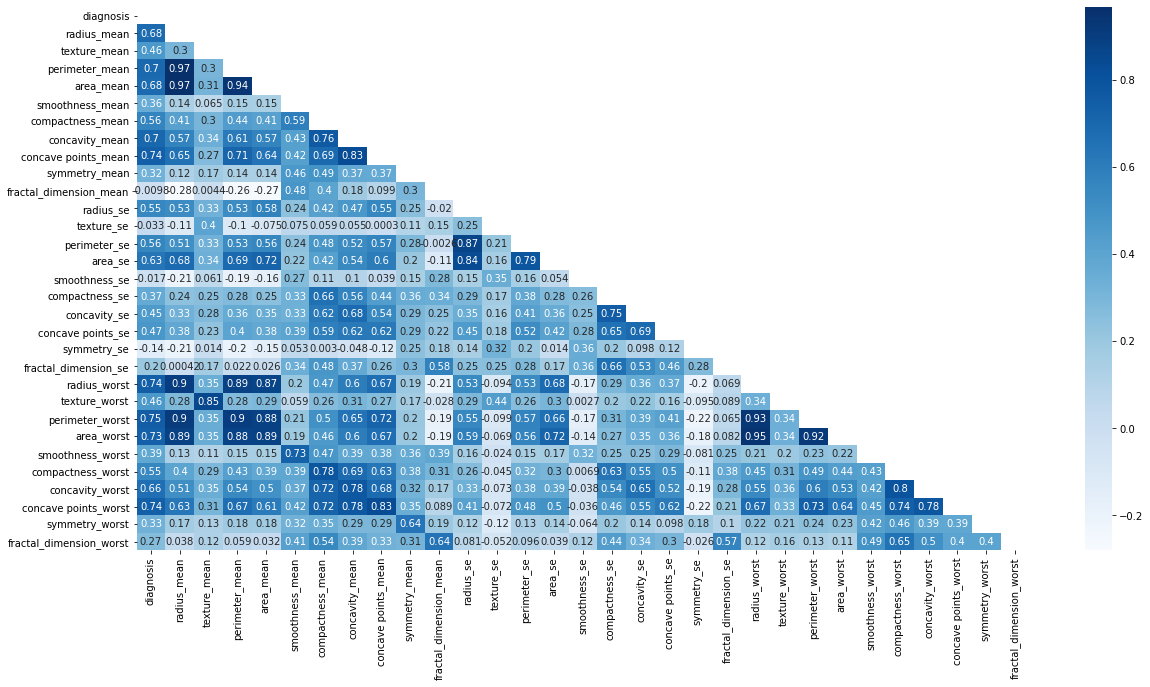

In [4]:
# Finding features with Higher correlations to diagnosis
plot.heat(df, "Blues", (20,10))

### From the Diagram, we can get an intuitions about the corrections values between the features

## Drawing the Causal graph

In [16]:
# Removing the less important features (with less correlation)
columns_list = ['smoothness_mean', 'smoothness_mean', 'smoothness_mean','texture_se', 'smoothness_se', 'symmetry_se']
df = data_processor.drop_columns(df, columns_list)
columnns = df.columns

## Scalling the dataset

In [17]:
df = data_processor.data_scaler(df)
df.columns = columnns

In [18]:
df.sample(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
401,0.0,0.364192,0.068807,0.351975,0.256934,0.174519,0.107820,0.143108,0.435237,0.209053,...,0.332578,0.334845,0.308476,0.221680,0.663428,0.242879,0.222320,0.291851,0.359438,0.274430
44,1.0,0.455442,0.693807,0.452943,0.333190,0.450666,0.341705,0.418486,0.551891,0.453011,...,0.470255,0.736907,0.456459,0.304584,0.792648,0.677305,0.547430,0.682088,0.854618,0.642210
419,0.0,0.307528,0.670872,0.295506,0.203349,0.213395,0.037050,0.085737,0.446500,0.440353,...,0.250992,0.696907,0.239042,0.149578,0.571271,0.155770,0.052599,0.182767,0.566667,0.252732


In [5]:
sm = from_pandas(df)

KeyboardInterrupt: 

## Model Building Using All Features Vs Features Obtained through Causal Inference

## 1.0 Using All features

In [7]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

# Splitting dependent and independent columns
x = df.drop(columns = 'diagnosis')
y = df['diagnosis']

KeyError: "['diagnosis'] not found in axis"

In [ ]:
# Split 80% train and 20% test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

### Testing Using Logistic Regression

In [ ]:
model_logistic = LogisticRegression()
model_logistic.fit(x_train, y_train)
print('Logistic regression accuracy: {:.4f}'.format(accuracy_score(y_test, model_logistic.predict(x_test))))

### Testing Using Random Forest Classfier

In [ ]:
model_randomforest = RandomForestClassifier()
model_randomforest.fit(x_train, y_train)
print('Random Forest accuracy: {:.4f}'.format(accuracy_score(y_test, model_randomforest.predict(x_test))))

## 2.0 Using delective Features from Causal Inference

### Preparing dataset, droping all columns that have little contributions on Diagnosis

In [ ]:
columns_list = ['smoothness_mean', 'smoothness_mean', 'smoothness_mean','texture_se', 'smoothness_se', 'symmetry_se']
df = data_processor.drop_columns(df, columns_list)

In [ ]:
# Splitting dependent and independent columns
x = df.drop(columns = 'diagnosis')
y = df['diagnosis']

In [ ]:
# Split 80% train and 20% test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

### Testing Using Logistic Regression

In [ ]:
model_logistic = LogisticRegression()
model_logistic.fit(x_train, y_train)
print('Logistic regression accuracy: {:.4f}'.format(accuracy_score(y_test, model_logistic.predict(x_test))))

### Testing Using Random Forest Classfier

In [ ]:
model_randomforest = RandomForestClassifier()
model_randomforest.fit(x_train, y_train)
print('Random Forest accuracy: {:.4f}'.format(accuracy_score(y_test, model_randomforest.predict(x_test))))